In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


In [0]:
!ls '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab7_Files/'
filename_markers = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab7_Files/markers.png'
filename_labels = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab7_Files/labels.png'
filename_bmp = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab7_Files/lab7.bmp'


blob_markers.txt  Lab7.ipynb	  Lab7_Template_1.ipynb  markers.png
lab7.bmp	  lab7_part1.txt  labels.png


In [0]:
#Part1
import numpy as np
def getSmallestNeighborIndex(img, row, col):
    min_row_id = -1
    min_col_id = -1
    min_val = np.inf
    h, w = img.shape
    for row_id in range(row - 1, row + 2):
        if row_id < 0 or row_id >= h:
            continue
        for col_id in range(col - 1, col + 2):
            if col_id < 0 or col_id >= w:
                continue
            if row_id == row and col_id == col:
                continue
            if img[row_id, col_id] < min_val:
                min_row_id = row_id
                min_col_id = col_id
                min_val = img[row_id, col_id]
    return min_row_id, min_col_id


def getRegionalMinima(img):
    regional_minima = np.zeros(img.shape, dtype=np.int32)
    h, w = img.shape
    #Your code here
    mini_id = 1
    for row in range(h):
      for col in range(w):
        min_row, min_col = getSmallestNeighborIndex(img, row, col)
        if min_row <0 or min_col<0:
          #reference of exception: https://stackoverflow.com/questions/13808259/how-do-i-return-an-exception
          raise Exception('getRegionalMinma error: the location ({:d},{:d}) not found'.format(row,col))
        if img[row,col] <= img[min_row,min_col]:
          regional_minima[row,col] = mini_id
          mini_id += 1
     
    return regional_minima    
        

def iterativeMinFollowing(img, markers):
    markers_copy = np.copy(markers)
    h, w = img.shape
    while True:
        #Your code here
        n_unmarked_pix = 0
        for row in range(h):
          for col in range(w):
            min_row,min_col = getSmallestNeighborIndex(img, row, col)
            if markers_copy[row,col] >0:
              continue
            if min_row <0 or min_col<0:
              #reference of exception: https://stackoverflow.com/questions/13808259/how-do-i-return-an-exception
              raise Exception('getRegionalMinma error: the location ({:d},{:d}) not found'.format(row,col)) 
            if markers_copy[min_row,min_col]>0:
              markers_copy[row,col]= markers_copy[min_row,min_col]
            if markers_copy[row,col] == 0:
              n_unmarked_pix +=1
               
        print ('n_unmarked_pix: ', n_unmarked_pix)
        if n_unmarked_pix == 0:
          break
        
        
    return markers_copy
  
  
test_image = np.loadtxt('/content/gdrive/My Drive/CMPUT 206 Wi19/Lab7_Files/lab7_part1.txt')
print('test_image: ')
for row in test_image:
  for elem in row:
        print('|',int(elem), end=' ')
  print('|')
#print('test_img: \n', test_image)

markers = getRegionalMinima(test_image)
#print('test_markers: \n', markers)
print('test_markers: ')
for row in markers:
  for elem in row:
        print('|',int(elem), end=' ')
  print('|')
  
labels = iterativeMinFollowing(test_image, markers)
#print('test_labels: \n',labels)
print('test_labels: ')
for row in labels:
  for elem in row:
        print('|',int(elem), end=' ')
  print('|')

test_image: 
| 10 | 100 | 20 | 2 | 15 |
| 75 | 6 | 30 | 11 | 3 |
| 19 | 43 | 38 | 45 | 5 |
| 1 | 22 | 0 | 17 | 100 |
| 12 | 7 | 5 | 100 | 88 |
| 16 | 66 | 59 | 44 | 23 |
test_markers: 
| 0 | 0 | 0 | 1 | 0 |
| 0 | 2 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 |
| 3 | 0 | 4 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 5 |
n_unmarked_pix:  0
test_labels: 
| 2 | 2 | 1 | 1 | 1 |
| 2 | 2 | 1 | 1 | 1 |
| 3 | 4 | 4 | 4 | 1 |
| 3 | 4 | 4 | 4 | 1 |
| 3 | 4 | 4 | 4 | 4 |
| 4 | 4 | 4 | 4 | 5 |


n_unmarked_pix:  1213
n_unmarked_pix:  495
n_unmarked_pix:  182
n_unmarked_pix:  59
n_unmarked_pix:  18
n_unmarked_pix:  4
n_unmarked_pix:  0


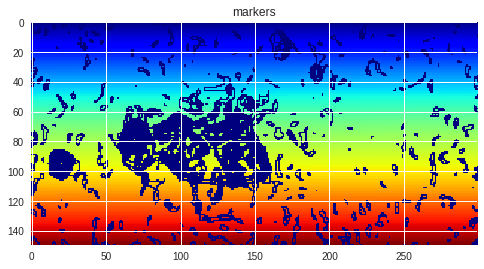

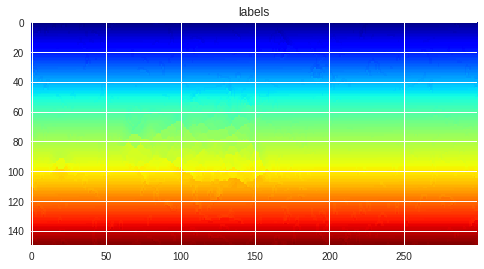

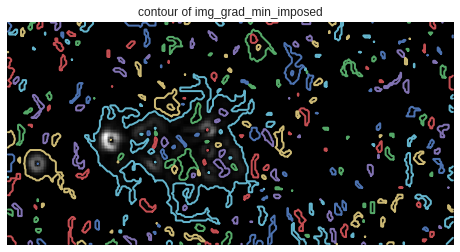

In [0]:
#Part2
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
import skimage
from skimage.measure import find_contours

def imreconstruct(marker, mask):
    curr_marker = (np.copy(marker)).astype(mask.dtype)
    kernel = np.ones([3, 3])
    while True:
      #https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
        next_marker = cv2.dilate(curr_marker, kernel, iterations=1)
        intersection = next_marker > mask
        next_marker[intersection] = mask[intersection]
        #Your code here
        #reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_equal.html
        if np.array_equal(next_marker,curr_marker):
          return curr_marker
        curr_marker = np.copy(next_marker)
        
    return curr_marker


def imimposemin(marker, mask):
    # adapted from its namesake in MATLAB
    fm = np.copy(mask)
    fm[marker] = -np.inf
    fm[np.invert(marker)] = np.inf
    if mask.dtype == np.float32 or mask.dtype == np.float64:
        range = float(np.max(mask) - np.min(mask))
        if range == 0:
            h = 0.1
        else:
            h = range * 0.001
    else:
        # Add 1 to integer images.
        h = 1
    fp1 = mask + h
    g = np.minimum(fp1, fm)
    return np.invert(imreconstruct(
        np.invert(fm.astype(np.uint8)), np.invert(g.astype(np.uint8))
    ).astype(np.uint8))

sigma = 2.5
img_name = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab7_Files/lab7.bmp'
img_rgb = io.imread(img_name).astype(np.float32)
img_gs = skimage.color.rgb2gray(img_rgb)

#img_blurred = ... Your code here
img_blurred = cv2.GaussianBlur(img_gs,(int(2*round(3*sigma)+1),int(2*round(3*sigma)+1)),sigma,
                              borderType=cv2.BORDER_REPLICATE)

# Your code here to get gradient of img_blurred
[img_grad_y, img_grad_x] = np.gradient(img_blurred)
img_grad = np.square(img_grad_x) + np.square(img_grad_y)

# refined blob locations generated generated in part 3 of lab 6
blob_markers = np.loadtxt('/content/gdrive/My Drive/CMPUT 206 Wi19/Lab7_Files/blob_markers.txt', dtype=np.bool, delimiter='\t')

#img_grad_min_imposed = ...Your code here
img_grad_min_imposed = imimposemin(blob_markers, img_grad)

#markers = Your code here
markers = getRegionalMinima(img_grad_min_imposed)
plt.figure(0)
plt.imshow(markers,cmap='jet')
plt.title('markers')

#labels = Your code here
markers_copy = np.copy(markers)
labels = iterativeMinFollowing(img_grad_min_imposed, markers_copy)
plt.figure(1)
plt.imshow(labels,cmap='jet')
plt.title('labels')

#contour of img_grad_min_imposed
#contours = Your code here
#reference:http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.find_contours
contours = find_contours(img_grad_min_imposed,0.8)


fig,ax=plt.subplots()
ax.set_title("contour of img_grad_min_imposed")
ax.imshow(img_grad_min_imposed, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)




ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


contour of img_gs:


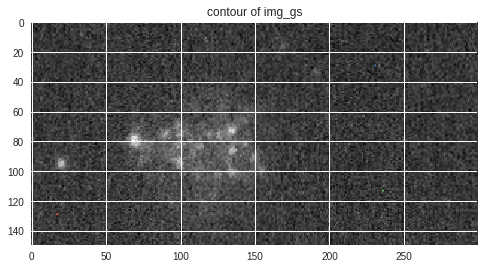

In [0]:
#Contour of img_gs
#contours = Your code here

contours =  find_contours(img_gs,0.8)
fig,ax=plt.subplots()
ax.imshow(img_gs, interpolation='nearest', cmap=plt.cm.gray)
ax.set_title('contour of img_gs')
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)